In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [ ]:
import pandas as pd

df = pd.read_html('http://kind.krx.co.kr/corpgeneral/corpList.do?method=download', header=0)[0]
!pip install lxml
df.head()

,회사명,종목코드,업종,주요제품,상장일,결산월,대표자명,홈페이지,지역
0,JS전선,5560,절연선 및 케이블 제조업,"선박선,고무선,전력선,통신선 제조",2007-11-12,12월,이익희,http://www.jscable.co.kr,충청남도
1,거북선2호,101380,NaN,운송장비(선박) 임대,2008-04-25,12월,신주선,NaN,부산광역시
2,거북선6호,114140,NaN,NaN,2009-10-01,12월,김연신,NaN,제주특별자치도
3,교보메리츠,64900,NaN,"부동산 투자,운용",2002-01-30,12월,김 상 진,NaN,서울특별시
4,국제관광공사,28780,NaN,NaN,1966-03-18,12월,NaN,NaN,NaN


# 종목코드 갖고 오기

In [ ]:
!pip install pandas_datareader
import pandas_datareader as pdr
yahoo = pdr.get_data_yahoo('000270.KS')
yahoo

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-10-26,54800.0,53700.0,53700.0,54600.0,837088.0,49344.511719
2015-10-27,55300.0,54000.0,54900.0,55100.0,1037136.0,49796.386719
2015-10-28,55500.0,54100.0,55500.0,54800.0,762999.0,49525.261719
2015-10-29,55300.0,54200.0,54300.0,54800.0,511535.0,49525.261719
2015-10-30,55900.0,54300.0,54800.0,55800.0,979684.0,50429.007812
...,...,...,...,...,...,...
2020-10-19,47750.0,46600.0,47000.0,46700.0,1536628.0,46700.000000
2020-10-20,47150.0,43150.0,43150.0,46850.0,4399855.0,46850.000000
2020-10-21,46750.0,45050.0,46550.0,45450.0,2311018.0,45450.000000


1. 종목 코드 뽑아내기
2. 종목코드 입력해서 주가 뽑아내기
3. RNN 이용해서 종목 분석
* RNN-이름.ipynb : 메일로 제출
* 추천종목 포함해서 보내세요

In [ ]:
# 종목 코드 뽑아내기
new_df = df[['회사명', '종목코드']]
new_df

,회사명,종목코드
0,JS전선,5560
1,거북선2호,101380
2,거북선6호,114140
3,교보메리츠,64900
4,국제관광공사,28780
...,...,...
3874,툴젠,199800
3875,플럼라인생명과학,222670
3876,피엔에이치테크,239890
3877,한국미라클피플사,331660


In [ ]:
# rename
rename_df = new_df.rename(columns={'회사명':'name', '종목코드':'code'})
rename_df

,name,code
0,JS전선,5560
1,거북선2호,101380
2,거북선6호,114140
3,교보메리츠,64900
4,국제관광공사,28780
...,...,...
3874,툴젠,199800
3875,플럼라인생명과학,222670
3876,피엔에이치테크,239890
3877,한국미라클피플사,331660


In [ ]:
# 회사명으로 코드 검색
def get_code(df, name):
    #code = df.query("name=='{}'".format(name))['code'].to_string(index=False)
    code = rename_df[(rename_df['name'] == name)]['code'].to_string(index=False)
    code = code.strip()
    return code

In [ ]:
# 종목코드 입력해서 주가 뽑아내기(전처리)
rename_df.code = rename_df.code.map('{:06d}'.format)
# code 6자리 맞추기
rename_df

,name,code
0,JS전선,005560
1,거북선2호,101380
2,거북선6호,114140
3,교보메리츠,064900
4,국제관광공사,028780
...,...,...
3874,툴젠,199800
3875,플럼라인생명과학,222670
3876,피엔에이치테크,239890
3877,한국미라클피플사,331660


In [ ]:
# name
list(df['회사명'])[100:200]

['굿라이프10-MF',
 '글로웍스',
 '네이쳐글로벌',
 '넷컴스토리지',
 '뉴젠아이씨티',
 '뉴켐진스템셀',
 '다임알짜2호-MF',
 '단암산업',
 '대백쇼핑',
 '대신증권그로쓰스팩',
 '데코',
 '동방티엔씨',
 '동아일렉콤',
 '동원뮤추얼장보고1호',
 '드림라인',
 '마이다스코코',
 '맥시스템',
 '모빌탑',
 '무한투자',
 '미래아이티2',
 '미래에셋알바트로스이',
 '미래에셋크린채권형이',
 '미래주식1',
 '미래하이2호',
 '미래하이4',
 '미래한아름2',
 '미주실업',
 '박현주1호',
 '박현주3성장',
 '박현주7성장',
 '베스트플로우',
 '부산방직',
 '비엔디',
 '비엔씨컴퍼니',
 '사라콤',
 '사이노젠',
 '삼능건설',
 '삼성라이프에머랄드일',
 '삼성프라임증권투자회',
 '성보섬유',
 '세븐코스프',
 '세원',
 '세이플러스',
 '스틸플라워',
 '승화프리텍',
 '신텍',
 '신한제4호스팩',
 '신호테크',
 '실크자산2',
 '심스밸리',
 '알루코',
 '알에스넷',
 '에이프로테크놀로지',
 '엘앤피아너스',
 '엠제이비',
 '영일케미컬',
 '우전',
 '원진',
 '유티엑스',
 '이글5호',
 '이랜드리테일',
 '이레전자산업',
 '이론테크',
 '이롬텍',
 '이앤텍',
 '익산',
 '일신',
 '제네시스',
 '조이토토',
 '중앙디자인',
 '지노시스템',
 '지디코프',
 '지앤알',
 '지에스엔텍',
 '지엔텍홀딩스',
 '챌린지성장2',
 '카카오M',
 '태평양금속',
 '트라이콤',
 '트윈스챌린지펀드',
 '파티게임즈',
 '팬텀엔터그룹',
 '퓨쳐인포넷',
 '플래닛82',
 '플래티넘성2-MF',
 '하림홀딩스',
 '한국4호스팩',
 '한국제5호스팩',
 '한국제6호스팩',
 '한국종합철관',
 '한국체인',
 '한국화이바',
 '한림창투',
 '한아시스템',
 '한일제관',
 '한컴지엠디',
 '한통엠닷컴',
 '희훈디앤지',
 '극동자동화

In [ ]:
# 회사명으로 코드 검색
name = 'LG디스플레이'
#rename_df.loc[name]['code'] # 인덱스를 'name'으로 바꿔야함
rename_df[(rename_df['name'] == name)]['code'].to_string(index=False)
code = get_code(rename_df, name) + '.KS'
code
# 이름이 중복 되면 제대로 작동 안함

'034220.KS'

In [ ]:
# 종목코드 입력해서 주가 뽑아내기
data = pdr.get_data_yahoo(code) # code = '톨젠'
data
# 야후에 데이터가 없으면 에러

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-10-26,22450.0,21850.0,22250.0,22050.0,1492608.0,20896.937500
2015-10-27,22000.0,21650.0,21950.0,21800.0,1269262.0,20660.009766
2015-10-28,22100.0,21250.0,21850.0,21300.0,1795717.0,20186.158203
2015-10-29,22250.0,21450.0,21450.0,21750.0,2003254.0,20612.626953
2015-10-30,22100.0,21550.0,21850.0,21600.0,1006532.0,20470.470703
...,...,...,...,...,...,...
2020-10-19,16200.0,15750.0,15900.0,15750.0,1465651.0,15750.000000
2020-10-20,15950.0,15500.0,15750.0,15750.0,1418515.0,15750.000000
2020-10-21,15900.0,15550.0,15750.0,15800.0,1278212.0,15800.000000


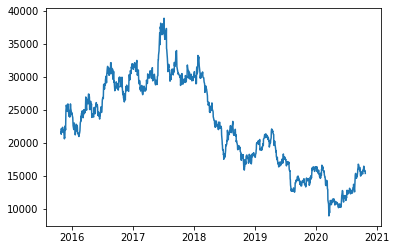

In [ ]:
# 시각화
plt.plot(data.index, data["Close"])

In [ ]:
cut_line =  int(np.round(data.shape[0] * 0.2))
cut_line

244

In [ ]:
# 전처리
x_train = pd.DataFrame(data.Close[:-cut_line])
x_test = pd.DataFrame(data.Close[-cut_line:])
data.shape, x_train.shape, x_test.shape

((1220, 6), (976, 1), (244, 1))

In [ ]:
# Scale Data, 정규화 과정
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
# MinMaxScaler : 0 ~ 1 사이로 정규화함
scaler.fit(x_train)
s_train = scaler.transform(x_train)
s_test = scaler.transform(x_test)
s_train.shape, s_test.shape

((976, 1), (244, 1))

In [ ]:
# time series Generator
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

length = 50 # 길어질수록 학습의 정확도는 높아짐
ts_train = TimeseriesGenerator(s_train, s_train, length=length, batch_size = 1)
ts_test = TimeseriesGenerator(s_test, s_test, length=length, batch_size = 1)
# stride: 연속되는 출력 시퀀스 사이의 기간. 보폭이 s이면, 연속되는 출력 샘플은 data[i]를 중심으로, data[i+s], data[i+2*s] 등이 됩니다.
# batch_size: 각 배치의 (마지막을 제외한) 시간 단계 샘플의 수.
# length = 50 : 50번째 값을 예측함

In [ ]:
# lstm
model_lstm = tf.keras.models.Sequential()
model_lstm.add(tf.keras.layers.LSTM(64, input_shape=(length,1) ))
model_lstm.add(tf.keras.layers.Dense(1))

In [ ]:
model_lstm.compile(optimizer='adam', loss='mse')

In [ ]:
model_lstm.fit(ts_train, epochs=8)

Epoch 1/8
926/926 [==============================] - 4s 4ms/step - loss: 0.0033
Epoch 2/8
926/926 [==============================] - 4s 4ms/step - loss: 0.0011
Epoch 3/8
926/926 [==============================] - 4s 4ms/step - loss: 9.1655e-04
Epoch 4/8
926/926 [==============================] - 4s 4ms/step - loss: 8.7782e-04
Epoch 5/8
926/926 [==============================] - 4s 4ms/step - loss: 7.8189e-04
Epoch 6/8
926/926 [==============================] - 4s 4ms/step - loss: 6.8563e-04
Epoch 7/8
926/926 [==============================] - 4s 4ms/step - loss: 6.3397e-04
Epoch 8/8
926/926 [==============================] - 4s 4ms/step - loss: 6.2354e-04


In [ ]:
# 예측 테스트
p_test_lstm = model_lstm.predict(ts_test)
ts_test[0][0].shape, p_test_lstm.shape

((1, 50, 1), (194, 1))

In [ ]:
# 정규화 원상복귀
r_test_lstm = scaler.inverse_transform(p_test_lstm)
# .inverse_transfor : 정규화(0~1) 한 것을 다시 원상 복귀

In [ ]:
# x_test 크기 맞추고, 합치기
cut_x_test = x_test.drop(x_test.index[0:length])
cut_x_test['lstm'] = r_test_lstm
cut_x_test

,Close,lstm
Date,,
2020-01-13,15400.0,16022.560547
2020-01-14,15700.0,15733.532227
2020-01-15,15600.0,15808.112305
2020-01-16,15550.0,15780.575195
2020-01-17,15850.0,15739.621094
...,...,...
2020-10-19,15750.0,16085.870117
2020-10-20,15750.0,15980.482422
2020-10-21,15800.0,15940.061523


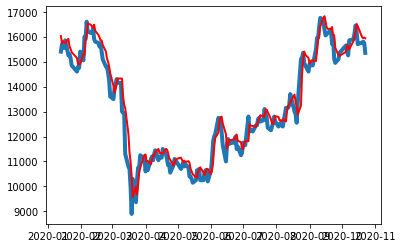

In [ ]:
# 시각화
plt.plot(cut_x_test.index, cut_x_test["Close"], linewidth = 4.0)
plt.plot(cut_x_test.index, cut_x_test.lstm,color='red', linewidth = 2.0)

In [ ]:
# 미래 예측
batch = s_test[-length:]

forecast_LSTM = []
c_batch_lstm = batch.reshape((1, length, 1))
num = 6

for i in range(num):
  c_predict_lstm = model_lstm.predict(c_batch_lstm)[0]
  forecast_LSTM.append(c_predict_lstm)
  c_batch_lstm = np.append(c_batch_lstm[:,1:,:], [[c_predict_lstm]], axis=1)

In [ ]:
# 정규화 되돌리기
forecast_lstm = scaler.inverse_transform(forecast_LSTM)
forecast_lstm.shape

(6, 1)

In [ ]:
# shape 맞추기(숫자로 변환)
reset_df = cut_x_test.reset_index()
forecast_ind = np.arange(reset_df.index[-1], reset_df.index[-1]+num )
reset_df, forecast_ind, forecast_ind.shape

(          Date    Close          lstm
 0   2020-01-13  15400.0  16022.560547
 1   2020-01-14  15700.0  15733.532227
 2   2020-01-15  15600.0  15808.112305
 3   2020-01-16  15550.0  15780.575195
 4   2020-01-17  15850.0  15739.621094
 ..         ...      ...           ...
 189 2020-10-19  15750.0  16085.870117
 190 2020-10-20  15750.0  15980.482422
 191 2020-10-21  15800.0  15940.061523
 192 2020-10-22  15750.0  15958.112305
 193 2020-10-23  15350.0  15935.531250
 
 [194 rows x 3 columns], array([193, 194, 195, 196, 197, 198]), (6,))

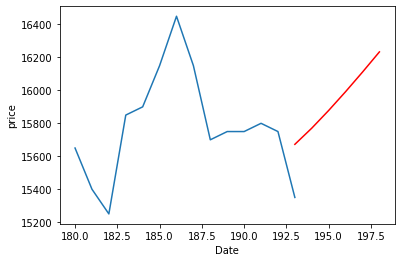

In [ ]:
# 시각화
plt.xlabel('Date')
plt.ylabel('price')
plt.plot(reset_df.index[180:], reset_df["Close"][180:])
plt.plot(forecast_ind, forecast_lstm, color='red')

In [ ]:
# shape 맞추기(날짜 그대로)
forecast_idx = np.linspace(0, 1, 365) * (np.datetime64('2021-10-24') - np.datetime64('2020-10-24')) + np.datetime64('2020-10-24')

In [ ]:
# shape 맞추기(날짜 그대로 사용)
forecast_idx = np.linspace(0, 1, 69) * (np.datetime64('2020-12-31') - np.datetime64('2020-10-24')) + np.datetime64('2020-10-24') #change

In [ ]:
reset_df

,Date,Close,lstm
0,2020-01-13,15400.0,16022.560547
1,2020-01-14,15700.0,15733.532227
2,2020-01-15,15600.0,15808.112305
3,2020-01-16,15550.0,15780.575195
4,2020-01-17,15850.0,15739.621094
...,...,...,...
189,2020-10-19,15750.0,16085.870117
190,2020-10-20,15750.0,15980.482422
191,2020-10-21,15800.0,15940.061523
192,2020-10-22,15750.0,15958.112305
